<a href="https://colab.research.google.com/github/joydeep03564/Machine_Learning-/blob/master/BankNote_Authentication_TF_Keras_Updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Group 15 Members

Joydeep Sinha Chowdhury - 2020MT12064 Vipin Kumar - 2020MT12123 Ajay Koteshwar - 2020MT12160 Kaushik Ramachandran - 2020MT12276

# DataSet and Problem Definition:

**Data Set Information:**

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

**Attribute Information:**

1. variance of Wavelet Transformed image (continuous)
2. skewness of Wavelet Transformed image (continuous)
3. curtosis of Wavelet Transformed image (continuous)
4. entropy of image (continuous)
5. class (integer)

**Problem Statement:** Given a Bank note we have to identify its authenticity. We can pose the machine learning problem as given 
four features(1. variance of Wavelet Transformed image (continuous)
2. skewness of Wavelet Transformed image (continuous)
3. curtosis of Wavelet Transformed image (continuous)
4. entropy of image (continuous)
), we have predict its class i.e 0 or 1. It is a binary classification problem.



In [ ]:
# Google colab drive mount 

from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
random.seed(42)         # Initialize the random number generator.
np.random.seed(42)      # With the seed reset, the same set of 
                        # numbers will appear every time. 
tf.random.set_seed(42)  # sets the graph-level random seed

The dataset is given in text format. We need to convert it to csv.
We are doing the conversion from text to csv and also adding headers to the dataset.

In [ ]:


data=pd.read_csv("data_banknote_authentication.txt",header=None)
data.columns =['variance_Wavelet','skewness_Wavelet','curtosis_wavelet','entropy_image','labels']
data.to_csv("data_banknote_authentication.csv",index=None)

In [ ]:
# Loading the dataset
dataset=pd.read_csv("data_banknote_authentication.csv")

In [ ]:
# Checking the dataset
dataset.head()

,variance_Wavelet,skewness_Wavelet,curtosis_wavelet,entropy_image,labels
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [ ]:
dataset.shape

(1372, 5)

In [ ]:
dataset.dtypes

variance_Wavelet    float64
skewness_Wavelet    float64
curtosis_wavelet    float64
entropy_image       float64
labels                int64
dtype: object

In [ ]:
# checking for Null values 
dataset.isnull().values.any()

False

In [ ]:
# Selecting duplicate rows except first occurrence based on all columns 
duplicate = dataset[dataset.duplicated()] 
duplicate

,variance_Wavelet,skewness_Wavelet,curtosis_wavelet,entropy_image,labels
47,-0.7869,9.5663,-3.7867,-7.5034,0
139,-0.2062,9.2207,-3.7044,-6.8103,0
190,0.9297,-3.7971,4.6429,-0.2957,0
195,-1.8584,7.8860,-1.6643,-1.8384,0
226,0.5706,-0.0248,1.2421,-0.5621,0
268,0.9297,-3.7971,4.6429,-0.2957,0
284,-1.3000,10.2678,-2.9530,-5.8638,0
300,0.3292,-4.4552,4.5718,-0.9888,0
315,0.3292,-4.4552,4.5718,-0.9888,0
320,0.5195,-3.2633,3.0895,-0.9849,0


In [ ]:
dataset.drop_duplicates(inplace=True)
dataset.shape

(1348, 5)

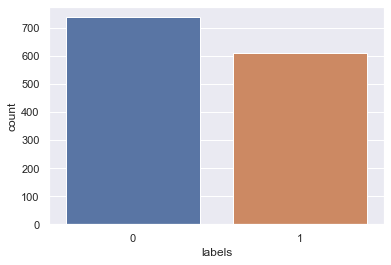

In [ ]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="labels", data = dataset)

In [ ]:
dataset['labels'].value_counts()

0    738
1    610
Name: labels, dtype: int64

In [ ]:
print('Distribution of the Classes in the dataset')
print(dataset['labels'].value_counts()/len(data)*100)

Distribution of the Classes in the dataset
0    53.790087
1    44.460641
Name: labels, dtype: float64


The dataset is not imbalanced.

Making variable X and Y

In [ ]:
# X has all the features i.e independ features
X=dataset.iloc[:,:4]

In [ ]:
X.head()

,variance_Wavelet,skewness_Wavelet,curtosis_wavelet,entropy_image
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [ ]:
# Class varaible or dependent variable is in Y
Y=dataset.iloc[:,4]

In [ ]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: labels, dtype: int64

**Feature Extraction and Importance:**

For this problem, the images(matrix of numbers) is being tranformed using Wevelet transform. We have the following features:

**Skewness:**It is the degree of distortion from the symmetrical bell curve or the normal distribution. It measures the lack of symmetry in data distribution.
It differentiates extreme values in one versus the other tail. A symmetrical distribution will have a skewness of 0.

**Kurtosis**
Kurtosis is all about the tails of the distribution — not the peakedness or flatness. It is used to describe the extreme values in one versus the other tail. It is actually the measure of outliers present in the distribution.

**Variance**
It is the spread of the distribution

Entropy: H=−∑ pklog2(pk)
In Image, Entropy is defined as corresponding states of intensity level which individual pixels can adapt. It is used in the quantitative analysis and evaluation image details, the entropy value is used as it provides better comparison of the image details.

After understanding each of the features significance, we can understand that each of the feature will play an important role in the classification. 

To justify our take on this, we will further perform the corelation plot and scatter plot to verify colinearity.

## Correlation:

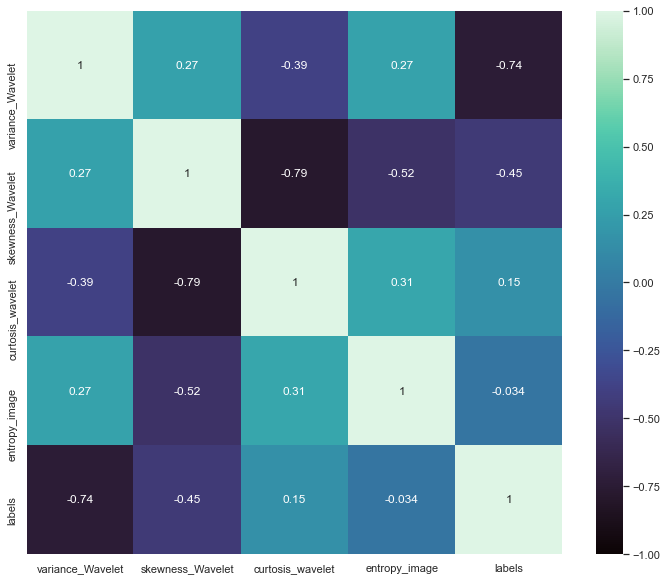

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(dataset.corr(),annot=True,vmin=-1,cmap='mako')
plt.show()

Few observation:
1. Labels vs variance_Wavelet is negetively correllated- But as label is categorical feature we don't really realy on this.
2. Curtosis Vs Skewness is negetively correlated 

<Figure size 1152x1152 with 0 Axes>

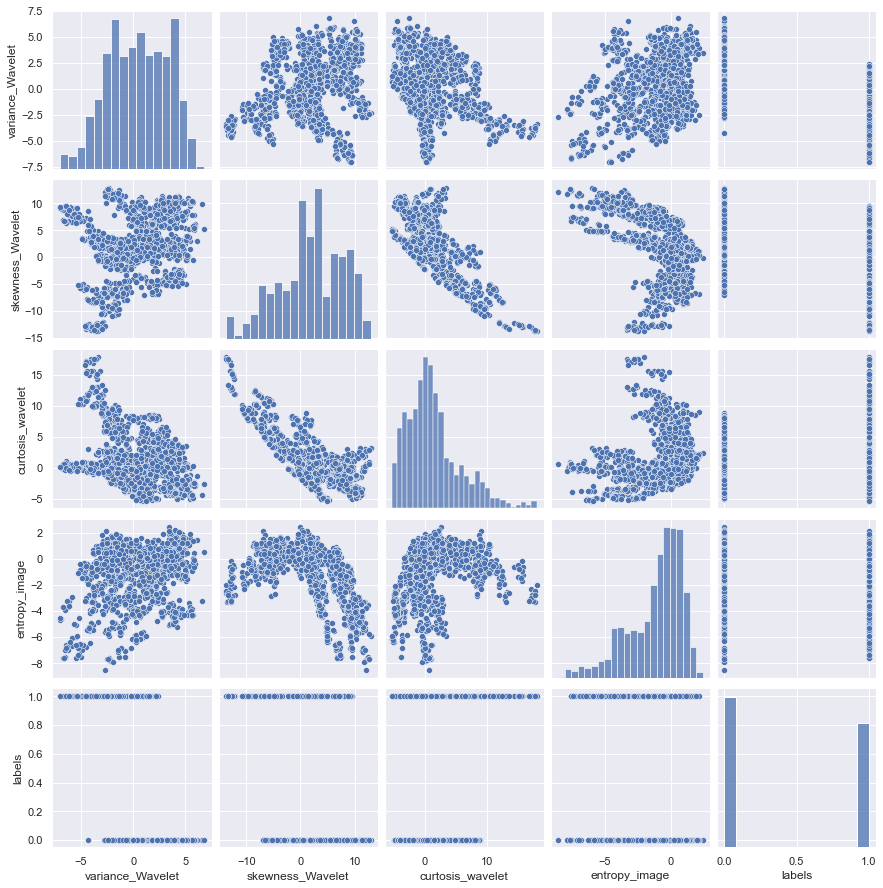

In [ ]:
plt.figure(figsize=(16,16))
sns.pairplot(dataset)
plt.show()

Here also we can see that there is a negetive relationship between skewness_wavelet and Curtosis_wavelet

C:\Users\ramackau\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ramackau\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ramackau\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

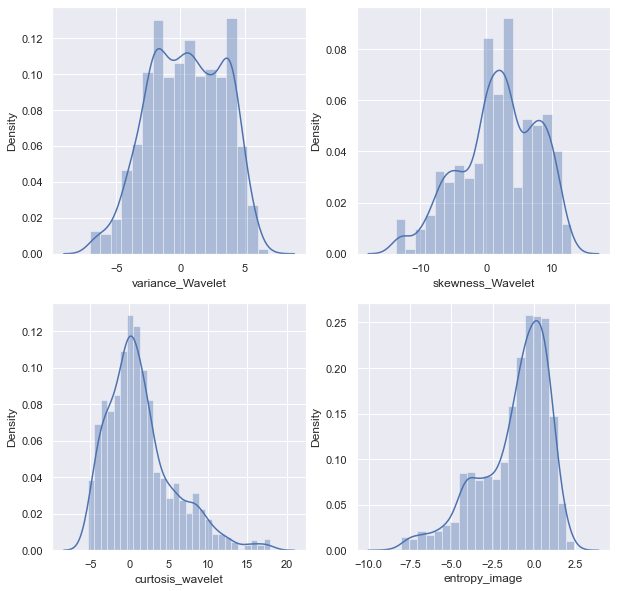

In [ ]:
# Performing univariate analysis also:

plt.figure(figsize=(10,10))
for i in range(len(X.columns)):
    plt.subplot(2, 2, i + 1)
    sns.distplot(X[X.columns[i]])
plt.show()


We can see the Skewness and Curtosis distribution is bit different and droping them may impact the result.
We will first try to build the model using all the four features.

# Preprocessing :

We can see from the univariate analysis that the distribution and variance are not uniform for all the features.
So we need to perform normalization to the columns so that the data range lies between mean 0 and variance 1.


In [ ]:

scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

In [ ]:
# Spliting the dataset into 70% and 30% 
  
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, shuffle=True, random_state=1)

# Model Building 


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout



In [ ]:
input_features=X_train.shape[1]
input_features

4

# Architecture:

The hidden layers and nodes are hyperparameters. 

In [ ]:
model=Sequential()
model.add(Dense(16,activation='relu',kernel_initializer='he_normal',input_shape=(input_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(.20))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
h = model.fit(X_train,y_train,batch_size=32,epochs=50,verbose=1,validation_split=0.2)
loss, acc = model.evaluate(X_test, y_test, verbose=0)



Epoch 1/50
24/24 [==============================] - 4s 132ms/step - loss: 1.0245 - accuracy: 0.4839 - val_loss: 0.8092 - val_accuracy: 0.5344
Epoch 2/50
24/24 [==============================] - 0s 4ms/step - loss: 0.8328 - accuracy: 0.5251 - val_loss: 0.6957 - val_accuracy: 0.5397
Epoch 3/50
24/24 [==============================] - 0s 4ms/step - loss: 0.6927 - accuracy: 0.5475 - val_loss: 0.6051 - val_accuracy: 0.5979
Epoch 4/50
24/24 [==============================] - 0s 4ms/step - loss: 0.6209 - accuracy: 0.5910 - val_loss: 0.5339 - val_accuracy: 0.6931
Epoch 5/50
24/24 [==============================] - 0s 4ms/step - loss: 0.5364 - accuracy: 0.7071 - val_loss: 0.4756 - val_accuracy: 0.7989
Epoch 6/50
24/24 [==============================] - 0s 3ms/step - loss: 0.5061 - accuracy: 0.7504 - val_loss: 0.4301 - val_accuracy: 0.8360
Epoch 7/50
24/24 [==============================] - 0s 4ms/step - loss: 0.4497 - accuracy: 0.8153 - val_loss: 0.3893 - val_accuracy: 0.9101
Epoch 8/50
24/24 [

In [ ]:
predictions = model.predict(
      x=X_test
    , batch_size=10
    , verbose=0
) 
for i in predictions:
    print(i)

[0.99637794]
[9.354074e-06]
[6.6165387e-07]
[6.563158e-07]
[3.465797e-06]
[0.8764397]
[2.7913247e-05]
[0.00018999]
[0.9853667]
[0.01018742]
[0.9991088]
[5.830534e-05]
[2.8916023e-05]
[0.00011499]
[0.9799657]
[0.00010384]
[5.337062e-05]
[0.9991286]
[2.0089632e-05]
[0.9577767]
[3.9875846e-05]
[0.9953209]
[2.4611632e-05]
[5.8228212e-05]
[0.00034544]
[4.3670157e-06]
[2.1128963e-05]
[0.9599396]
[2.20711e-06]
[0.00011653]
[0.9674698]
[2.578913e-05]
[1.313599e-06]
[0.98694575]
[0.9851141]
[6.7405366e-05]
[0.9988444]
[1.1301885e-05]
[0.99878895]
[0.97291803]
[2.0438114e-05]
[6.042443e-05]
[0.0005773]
[0.9743417]
[5.9746037e-07]
[0.99679536]
[0.10657331]
[2.668344e-05]
[0.95182174]
[4.0011077e-05]
[3.61577e-06]
[0.99638253]
[8.629331e-05]
[0.99872065]
[1.5956492e-05]
[2.973433e-07]
[5.7932843e-06]
[0.9942037]
[0.9899597]
[1.7275277e-05]
[0.989738]
[0.04225424]
[0.98377836]
[0.96742284]
[8.883493e-07]
[0.9813751]
[0.9915985]
[2.0739535e-06]
[0.83406186]
[0.9827375]
[0.98582363]
[3.4777959e-06]
[

In [ ]:
y_pred = (predictions > 0.5)
for i in y_pred:
    print(i)

[ True]
[False]
[False]
[False]
[False]
[ True]
[False]
[False]
[ True]
[False]
[ True]
[False]
[False]
[False]
[ True]
[False]
[False]
[ True]
[False]
[ True]
[False]
[ True]
[False]
[False]
[False]
[False]
[False]
[ True]
[False]
[False]
[ True]
[False]
[False]
[ True]
[ True]
[False]
[ True]
[False]
[ True]
[ True]
[False]
[False]
[False]
[ True]
[False]
[ True]
[False]
[False]
[ True]
[False]
[False]
[ True]
[False]
[ True]
[False]
[False]
[False]
[ True]
[ True]
[False]
[ True]
[False]
[ True]
[ True]
[False]
[ True]
[ True]
[False]
[ True]
[ True]
[ True]
[False]
[False]
[False]
[ True]
[ True]
[ True]
[ True]
[ True]
[False]
[ True]
[ True]
[ True]
[ True]
[False]
[ True]
[False]
[ True]
[False]
[False]
[False]
[ True]
[False]
[ True]
[False]
[ True]
[ True]
[False]
[False]
[ True]
[False]
[ True]
[False]
[False]
[ True]
[False]
[ True]
[ True]
[ True]
[False]
[False]
[ True]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[ True]
[False]
[False]
[False]
[False]
[False]


In [ ]:

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_true = y_test,y_pred = y_pred )

In [ ]:
matrix

array([[236,   1],
       [  0, 168]], dtype=int64)

In [ ]:
print('Final training loss \t', h.history['loss'][-1])
print('Final training accuracy ', h.history['accuracy'][-1])

Final training loss 	 0.03880440443754196
Final training accuracy  0.9907161593437195


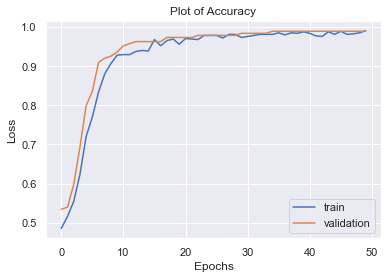

In [ ]:
# plot the training  accuracy  
import matplotlib.pyplot as plt

plt.plot(h.history['accuracy'], label='train')
plt.plot(h.history['val_accuracy'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Accuracy')
plt.legend()
plt.show()

We are not overfitting.